# **Multi-label music genre classification of tracks** - Groupe de statistique appliquée

## Plannification du projet :

1. Bibliography : quick summary of the first papers, keep the good ideas of modelisation, evaluation, visualisation...
2. Descriptive analysis of the data : genres distribution, genres cardinality, density
3. Definition of the evaluation metrics to keep
4. Definition of the baselines to have a first naive evaluation metric to compare with our future models
5. Split of the dataset (train / validation / test)
6. Some first ML models to predict the genres (binary classification or multi classification)
7. Deepdive into evaluation, results and interpretation
8. Graphic visualisation of the genres distribution
9. More work on the data: NLP on the song titles
10. If time: ensemble techniques

## Importation des modules utiles

In [1]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.manifold import TSNE
from src.modelisation.utils import *

## Analyse descriptive des données

In [2]:
df = pd.read_parquet("dataset2.parquet", engine="pyarrow")

In [3]:
df.head(5)

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,rap,jazz,electronic,african,country,song_index,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,195,"[0.7089933156967163, -0.6799708008766174, -0.3...","[-0.008137362965188247, -0.004262254068607103,...",Miles Davis,Générique
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,417,"[-0.19785162806510925, 0.023803016170859337, 0...","[0.00041993208544090015, 0.0001525178585704480...",Spin Doctors,Two Princes
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,530,"[-0.14142198860645294, 0.26422423124313354, 0....","[-0.009766703341977859, 0.0019064089803134893,...",Justin Bieber,One Less Lonely Girl
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,909,"[-0.07582522183656693, -0.42076417803764343, -...","[0.005023148381526522, 0.010775540737929749, 0...",Paul McCartney,My Love
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1257,"[-0.16135981678962708, -0.07056394964456558, -...","[0.00517276708433931, 0.006723451311827004, 0....",Jackson 5,Dancing Machine


In [4]:
df.describe()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,song_index
count,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,...,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000,50562.000000
mean,0.011254,0.041672,0.047862,0.008841,0.131601,0.081998,0.020687,0.051244,0.046537,0.161782,...,0.020767,0.022823,0.052648,0.118073,0.090068,0.031130,0.094775,0.026364,0.032969,25114.104545
std,0.105485,0.199840,0.213476,0.093609,0.338060,0.274365,0.142337,0.220497,0.210647,0.368254,...,0.142603,0.149342,0.223332,0.322698,0.286281,0.173671,0.292906,0.160216,0.178558,14534.454932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12519.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25098.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37706.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50304.000000


In [ ]:
# 12% metal, 16% rock, 13% pop

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50562 entries, 0 to 50561
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asian           50562 non-null  int32 
 1   rnb             50562 non-null  int32 
 2   reggae          50562 non-null  int32 
 3   blues           50562 non-null  int32 
 4   pop             50562 non-null  int32 
 5   dance           50562 non-null  int32 
 6   folk            50562 non-null  int32 
 7   arabic-music    50562 non-null  int32 
 8   indie           50562 non-null  int32 
 9   rock            50562 non-null  int32 
 10  soulfunk        50562 non-null  int32 
 11  latin           50562 non-null  int32 
 12  classical       50562 non-null  int32 
 13  k-pop           50562 non-null  int32 
 14  brazilian       50562 non-null  int32 
 15  metal           50562 non-null  int32 
 16  rap             50562 non-null  int32 
 17  jazz            50562 non-null  int32 
 18  electr

In [ ]:
# 26 variables: 4 object, 1 index et 21 binaires (genre musical)

In [6]:
df1= df.drop('song_index', 1)
df1.head()

/tmp/ipykernel_1198/2593859387.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1= df.drop('song_index', 1)


,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,metal,rap,jazz,electronic,african,country,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,"[0.7089933156967163, -0.6799708008766174, -0.3...","[-0.008137362965188247, -0.004262254068607103,...",Miles Davis,Générique
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,"[-0.19785162806510925, 0.023803016170859337, 0...","[0.00041993208544090015, 0.0001525178585704480...",Spin Doctors,Two Princes
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,"[-0.14142198860645294, 0.26422423124313354, 0....","[-0.009766703341977859, 0.0019064089803134893,...",Justin Bieber,One Less Lonely Girl
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,"[-0.07582522183656693, -0.42076417803764343, -...","[0.005023148381526522, 0.010775540737929749, 0...",Paul McCartney,My Love
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"[-0.16135981678962708, -0.07056394964456558, -...","[0.00517276708433931, 0.006723451311827004, 0....",Jackson 5,Dancing Machine


In [7]:
corr_df=df1.corr()

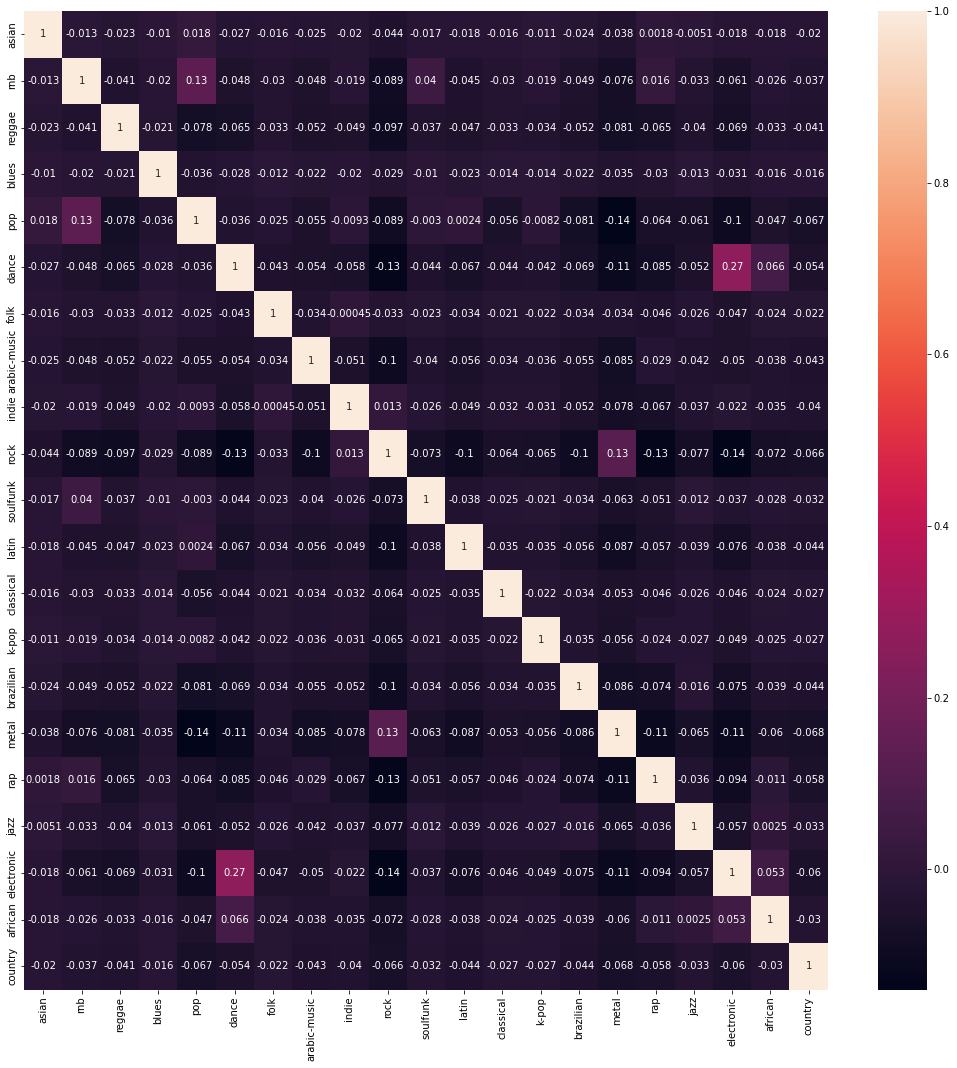

In [8]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_df.style.background_gradient(cmap='RdYlGn', axis=1, text_color_threshold= 0.5, low=0.2)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("")\
    .set_precision(2)\
    .set_table_styles(magnify())

/tmp/ipykernel_1198/3922392644.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='RdYlGn', axis=1, text_color_threshold= 0.5, low=0.2)\


,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
asian,1.00,-0.01,-0.02,-0.01,0.02,-0.03,-0.02,-0.02,-0.02,-0.04,-0.02,-0.02,-0.02,-0.01,-0.02,-0.04,0.00,-0.01,-0.02,-0.02,-0.02
rnb,-0.01,1.00,-0.04,-0.02,0.13,-0.05,-0.03,-0.05,-0.02,-0.09,0.04,-0.04,-0.03,-0.02,-0.05,-0.08,0.02,-0.03,-0.06,-0.03,-0.04
reggae,-0.02,-0.04,1.00,-0.02,-0.08,-0.07,-0.03,-0.05,-0.05,-0.10,-0.04,-0.05,-0.03,-0.03,-0.05,-0.08,-0.07,-0.04,-0.07,-0.03,-0.04
blues,-0.01,-0.02,-0.02,1.00,-0.04,-0.03,-0.01,-0.02,-0.02,-0.03,-0.01,-0.02,-0.01,-0.01,-0.02,-0.03,-0.03,-0.01,-0.03,-0.02,-0.02
pop,0.02,0.13,-0.08,-0.04,1.00,-0.04,-0.03,-0.06,-0.01,-0.09,-0.00,0.00,-0.06,-0.01,-0.08,-0.14,-0.06,-0.06,-0.10,-0.05,-0.07
dance,-0.03,-0.05,-0.07,-0.03,-0.04,1.00,-0.04,-0.05,-0.06,-0.13,-0.04,-0.07,-0.04,-0.04,-0.07,-0.11,-0.09,-0.05,0.27,0.07,-0.05
folk,-0.02,-0.03,-0.03,-0.01,-0.03,-0.04,1.00,-0.03,-0.00,-0.03,-0.02,-0.03,-0.02,-0.02,-0.03,-0.03,-0.05,-0.03,-0.05,-0.02,-0.02
arabic-music,-0.02,-0.05,-0.05,-0.02,-0.06,-0.05,-0.03,1.00,-0.05,-0.10,-0.04,-0.06,-0.03,-0.04,-0.05,-0.09,-0.03,-0.04,-0.05,-0.04,-0.04
indie,-0.02,-0.02,-0.05,-0.02,-0.01,-0.06,-0.00,-0.05,1.00,0.01,-0.03,-0.05,-0.03,-0.03,-0.05,-0.08,-0.07,-0.04,-0.02,-0.04,-0.04
rock,-0.04,-0.09,-0.10,-0.03,-0.09,-0.13,-0.03,-0.10,0.01,1.00,-0.07,-0.10,-0.06,-0.07,-0.10,0.13,-0.13,-0.08,-0.14,-0.07,-0.07


In [10]:
import pandas as pd
import numpy as np


corr_df.style.background_gradient(cmap='RdYlGn')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
asian,1.000000,-0.012864,-0.023041,-0.010076,0.018369,-0.027101,-0.015506,-0.024794,-0.020009,-0.044323,-0.017304,-0.018033,-0.015536,-0.011282,-0.024310,-0.038455,0.001802,-0.005088,-0.017877,-0.017555,-0.019699
rnb,-0.012864,1.000000,-0.041190,-0.019694,0.133415,-0.048254,-0.029613,-0.047565,-0.019288,-0.088924,0.039541,-0.044584,-0.030367,-0.019277,-0.048715,-0.076299,0.015981,-0.032819,-0.061053,-0.026283,-0.036841
reggae,-0.023041,-0.041190,1.000000,-0.021175,-0.078236,-0.065320,-0.032587,-0.051686,-0.048653,-0.096989,-0.036505,-0.047027,-0.032650,-0.034265,-0.052440,-0.081462,-0.065037,-0.040189,-0.069067,-0.033424,-0.041398
blues,-0.010076,-0.019694,-0.021175,1.000000,-0.036140,-0.028226,-0.012242,-0.021949,-0.019862,-0.028869,-0.010008,-0.022571,-0.013753,-0.014434,-0.022264,-0.034556,-0.029713,-0.013279,-0.030559,-0.015541,-0.016255
pop,0.018369,0.133415,-0.078236,-0.036140,1.000000,-0.036382,-0.025342,-0.055183,-0.009348,-0.088887,-0.003023,0.002450,-0.056280,-0.008175,-0.080507,-0.136637,-0.064233,-0.060684,-0.100794,-0.047261,-0.066965
dance,-0.027101,-0.048254,-0.065320,-0.028226,-0.036382,1.000000,-0.043438,-0.053766,-0.057815,-0.128756,-0.044300,-0.066965,-0.043523,-0.041814,-0.068842,-0.108685,-0.085216,-0.052327,0.266059,0.065554,-0.054377
folk,-0.015506,-0.029613,-0.032587,-0.012242,-0.025342,-0.043438,1.000000,-0.033778,-0.000447,-0.032912,-0.023440,-0.034122,-0.021166,-0.022212,-0.034263,-0.034234,-0.045727,-0.026053,-0.047028,-0.023917,-0.022168
arabic-music,-0.024794,-0.047565,-0.051686,-0.021949,-0.055183,-0.053766,-0.033778,1.000000,-0.051344,-0.102101,-0.040131,-0.055544,-0.033844,-0.035518,-0.054787,-0.085036,-0.028627,-0.041658,-0.049782,-0.037683,-0.042912
indie,-0.020009,-0.019288,-0.048653,-0.019862,-0.009348,-0.057815,-0.000447,-0.051344,1.000000,0.013087,-0.025830,-0.049478,-0.032173,-0.030620,-0.051661,-0.077636,-0.067211,-0.037438,-0.021799,-0.035182,-0.040267
rock,-0.044323,-0.088924,-0.096989,-0.028869,-0.088887,-0.128756,-0.032912,-0.102101,0.013087,1.000000,-0.072979,-0.101196,-0.063977,-0.065343,-0.099719,0.125352,-0.128275,-0.077202,-0.140135,-0.072292,-0.066380


Text(0.5, -0.15, 'Matrice de corrélation')

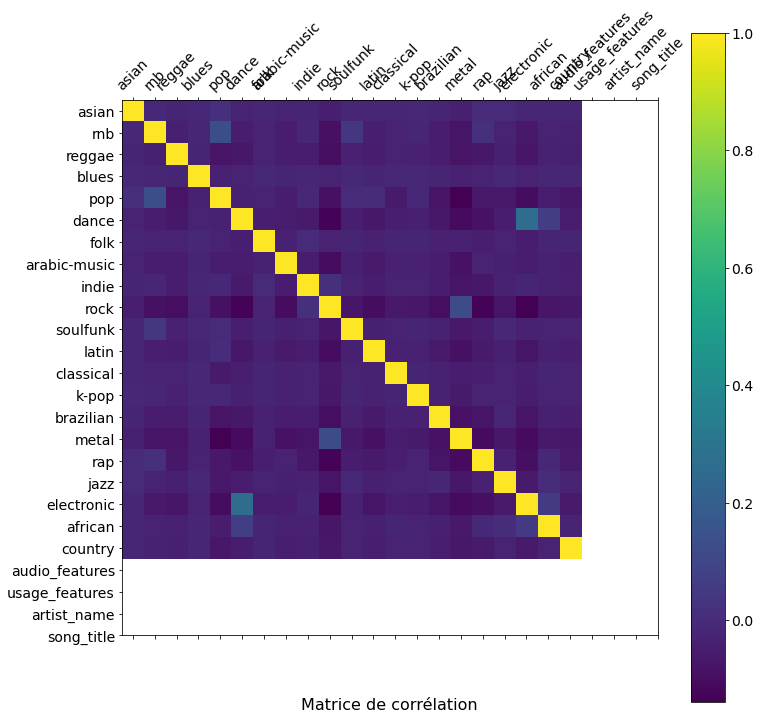

In [11]:
f = plt.figure(figsize=(12, 12))

plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [12]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].sum().sort_values(ascending=False)

In [13]:
y

rock            8180
pop             6654
metal           5970
electronic      4792
rap             4554
dance           4146
latin           2732
brazilian       2662
arabic-music    2591
reggae          2420
indie           2353
rnb             2107
country         1667
jazz            1574
soulfunk        1464
african         1333
k-pop           1154
classical       1050
folk            1046
asian            569
blues            447
dtype: int64

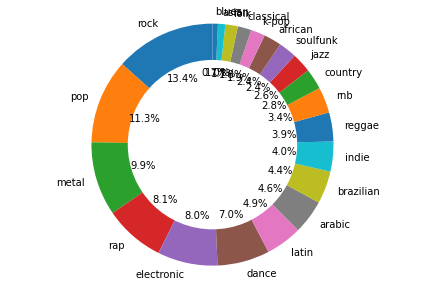

In [18]:
labels = 'rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues',
sizes = [8967,7549,6598,5410,5370,4674,3250,3046,2913,2679,2587,2307,1854,1750,1611,1588,1274,1214,1119,655,481]


 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

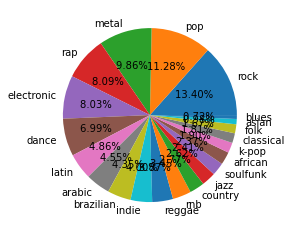

In [19]:
import matplotlib.pyplot as plt

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = [8967,7549,6598,5410,5370,4674,3250,3046,2913,2679,2587,2307,1854,1750,1611,1588,1274,1214,1119,655,481]

labels = ['rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  '.format(p=pct)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [20]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].mean().sort_values(ascending=False)
y=y*100
y

rock            16.178158
pop             13.160081
metal           11.807286
electronic       9.477473
rap              9.006764
dance            8.199834
latin            5.403267
brazilian        5.264823
arabic-music     5.124402
reggae           4.786203
indie            4.653692
rnb              4.167161
country          3.296942
jazz             3.113010
soulfunk         2.895455
african          2.636367
k-pop            2.282346
classical        2.076658
folk             2.068747
asian            1.125351
blues            0.884063
dtype: float64

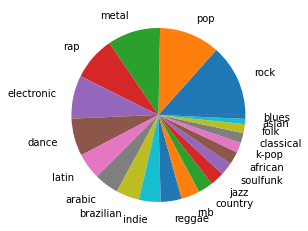

In [27]:
import matplotlib.pyplot as plt
 
# create random data
names='rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues',
values=[15.8,13.3,11.62,9.53,9.46,8.23,5.73,5.37,5.13,4.72,4.56,4.06,3.26,3.08,2.84,2.8,2.24,2.14,1.97,1.15,0.85]

# Label distance: gives the space between labels and the center of the pie

plt.pie(values, labels=names, labeldistance=1.2);
plt.show();

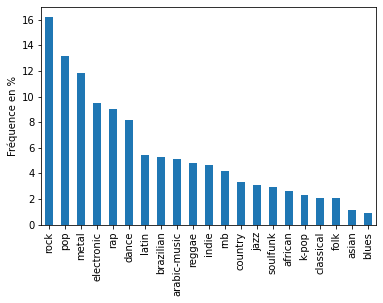

In [21]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].mean().sort_values(ascending=False)
y=y*100
ax = y.plot(kind='bar')
ax.set_ylabel('Fréquence en %')
plt.show()

In [22]:
D = len(df) #nombre de chansons de la base
L = 21 #nombre de genres
df["nbr labels"] = df.iloc[:,0:21].sum(axis=1) #nombre de labels par chanson

In [23]:
#label cardinality
label_cardinality = df["nbr labels"].sum()/D
print(label_cardinality)

#label density
label_density = label_cardinality/L
print(label_density)

1.1760808512321506
0.05600385005867384


Text(0.5, 1.0, 'Le nombre de labels par chanson')

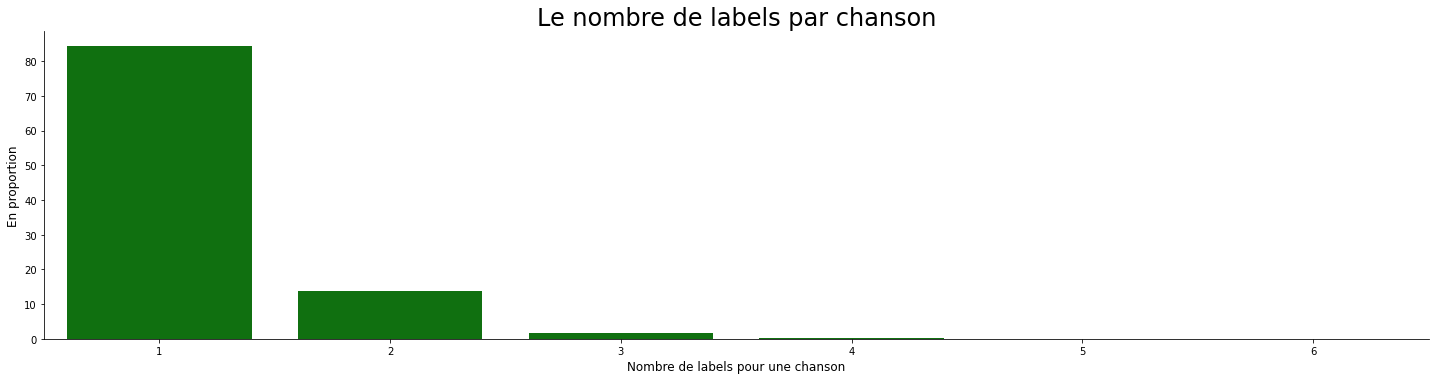

In [24]:
# Les chansons en fonction du nombre de labels
df2=df.groupby("nbr labels").agg({'asian':'count'})
df2.rename({'asian':'Nbre de chansons'},axis=1,inplace=True)
df2["Nbre labels"]=df2.index
df2["Pourcentage"]=df2['Nbre de chansons']*100/D
g = sns.catplot(x='Nbre labels', y='Pourcentage', data=df2, kind = "bar", height = 5, aspect = 4, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Nombre de labels pour une chanson', size = 12)
plt.ylabel('En proportion', size = 12)
plt.title('Le nombre de labels par chanson', size=24)

In [30]:
features = [list(df['audio_features'][i]) for i in range(len(df['audio_features']))]
X = np.array(features)
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)                                                          

In [32]:
X_embedded.shape

(50562, 2)

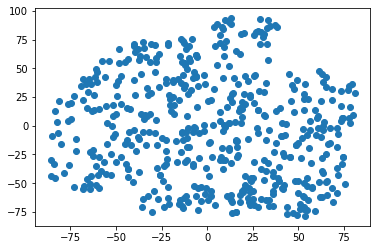

In [33]:
plt.scatter(X_embedded[:500,0], X_embedded[:500,1])

In [34]:
labels = create_labels(df, 21)

In [37]:
transform_labels_into_strings(labels[6])

NameError: name 'l' is not defined

In [ ]:
count_label_occurences(labels)[0]

In [ ]:
count_label_occurences(labels)[1]